In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [92]:
# Set parameters
mu_d = 10.0
rho = 0.05
gan = 12.0


α, β, ρ1, ρ2, σ = mu_d * (1 - rho), 0.95, rho, 0.0, 1.0

R = 1 / β
A = np.array([[1.0, 0.0, 0.0], [α, ρ1, ρ2], [0.0, 1.0, 0.0]])
C = np.array([[0.0], [σ], [0.0]])
G = np.array([[0.0, 1.0, 0.0]])

In [93]:
A12 = np.zeros((3, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, 0.0, R]])
ALQ = np.vstack([ALQ_l, ALQ_r])

RLQ = np.array(
    [
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 1e-9],
    ]
)

QLQ = np.array([1.0])
BLQ = np.array([0.0, 0.0, 0.0, -1.0]).reshape(4, 1)
CLQ = np.array([0.0, σ, 0.0, 0.0]).reshape(4, 1)
β_LQ = β

In [94]:
lqpi = qe.LQ(QLQ, RLQ, ALQ, BLQ, C=CLQ, beta=β_LQ)
P, F, d = lqpi.stationary_values()  # Compute value function and decision rule

In [95]:
F

array([[ 2.52493456, -0.05249346,  0.        , -0.0526316 ]])

In [96]:
#y = np.array([[1, 0, d_0,0]])
#y.shape

In [97]:
Tmp = ALQ - np.dot(BLQ, F)

iter_t = 200
d_0 = 0.0

eps = np.random.randn(iter_t)
y = np.array([[1.0, 0.0, 0.0, 0.0]])
# print(y[0])
# print(y.shape)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    print(y.shape)
    y = np.insert(y, 0, np.dot(Tmp, y[0].T) + CLQ.T * eps[i], axis=0)

(1, 4)
(2, 4)
(3, 4)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(8, 4)
(9, 4)
(10, 4)
(11, 4)
(12, 4)
(13, 4)
(14, 4)
(15, 4)
(16, 4)
(17, 4)
(18, 4)
(19, 4)
(20, 4)
(21, 4)
(22, 4)
(23, 4)
(24, 4)
(25, 4)
(26, 4)
(27, 4)
(28, 4)
(29, 4)
(30, 4)
(31, 4)
(32, 4)
(33, 4)
(34, 4)
(35, 4)
(36, 4)
(37, 4)
(38, 4)
(39, 4)
(40, 4)
(41, 4)
(42, 4)
(43, 4)
(44, 4)
(45, 4)
(46, 4)
(47, 4)
(48, 4)
(49, 4)
(50, 4)
(51, 4)
(52, 4)
(53, 4)
(54, 4)
(55, 4)
(56, 4)
(57, 4)
(58, 4)
(59, 4)
(60, 4)
(61, 4)
(62, 4)
(63, 4)
(64, 4)
(65, 4)
(66, 4)
(67, 4)
(68, 4)
(69, 4)
(70, 4)
(71, 4)
(72, 4)
(73, 4)
(74, 4)
(75, 4)
(76, 4)
(77, 4)
(78, 4)
(79, 4)
(80, 4)
(81, 4)
(82, 4)
(83, 4)
(84, 4)
(85, 4)
(86, 4)
(87, 4)
(88, 4)
(89, 4)
(90, 4)
(91, 4)
(92, 4)
(93, 4)
(94, 4)
(95, 4)
(96, 4)
(97, 4)
(98, 4)
(99, 4)
(100, 4)
(101, 4)
(102, 4)
(103, 4)
(104, 4)
(105, 4)
(106, 4)
(107, 4)
(108, 4)
(109, 4)
(110, 4)
(111, 4)
(112, 4)
(113, 4)
(114, 4)
(115, 4)
(116, 4)
(117, 4)
(118, 4)
(119, 4)
(120, 4)
(121, 4)
(122, 4)
(123, 4)
(

In [98]:
y = y[::-1]
# print(y)
k_get = y[:, 3]
d_get = y[:, 1]

one_get = y[:, 0]
x = np.array(range(iter_t + 1))

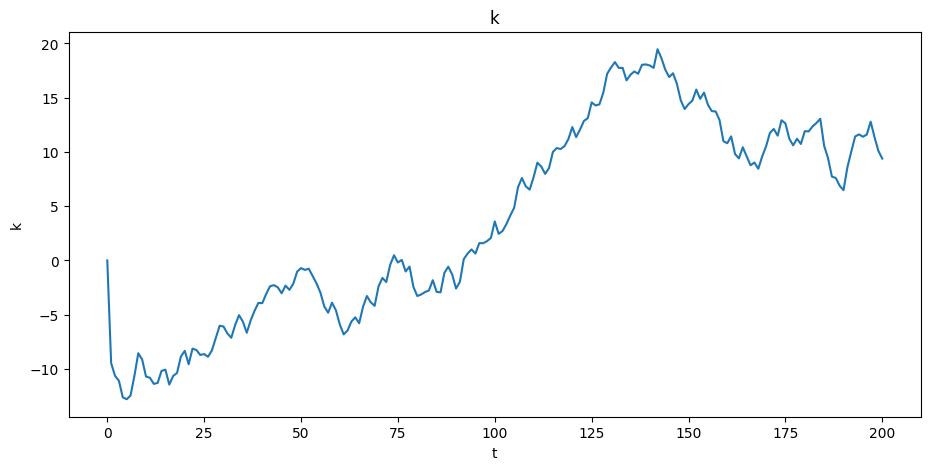

In [99]:
plt.figure()
plt.xlabel("t")
plt.ylabel("k")
plt.title("貯蓄")

plt.plot(x, k_get)

(201,)


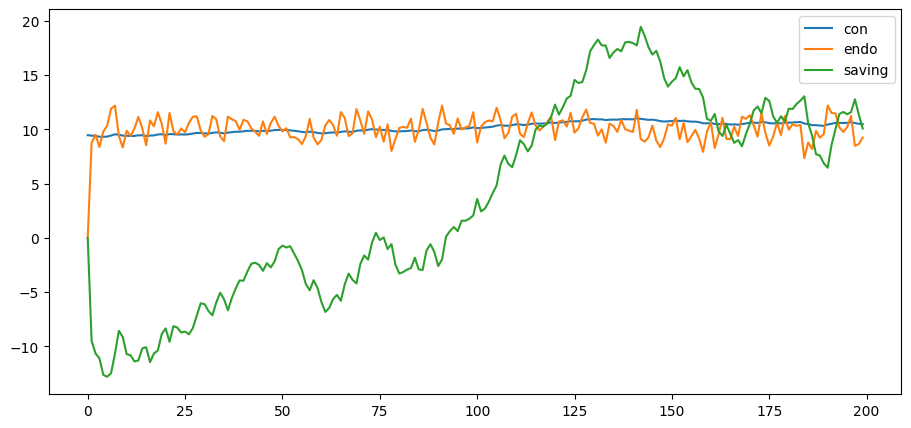

In [100]:
c = np.zeros(iter_t+1)
    # print("c size before %d"%c.shape)
c[0] = 0
where = 0
for i in range(iter_t):
    #print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    #print(i)
    #print(y[i])
    c[i] = -F@y[i]+gan
    #print("c = %d"%c[i])
    
print(c.shape)

plt.plot(
    np.array(range(iter_t)),
    c[:iter_t],
    label="con"
)
plt.plot(
    np.array(range(iter_t)),
    d_get[:iter_t],
    label="endo"
)
plt.plot(
    np.array(range(iter_t)),
    k_get[:iter_t],
    label="saving"
)
plt.legend()